In [2]:

# Importing Libraries
import ast
import seaborn as sns
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Loading Data
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
df_sg = df[df['job_country'] == 'Singapore'].dropna(subset=['salary_year_avg'])

In [43]:
job_titles = ['Data Scientist', 'Machine Learning Engineer','Data Analyst']

job_titles

['Data Scientist', 'Machine Learning Engineer', 'Data Analyst']

In [44]:
df_sg_specific_jobs = df_sg[df_sg['job_title_short'].isin(job_titles)]

In [45]:
job_order = df_sg_specific_jobs.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

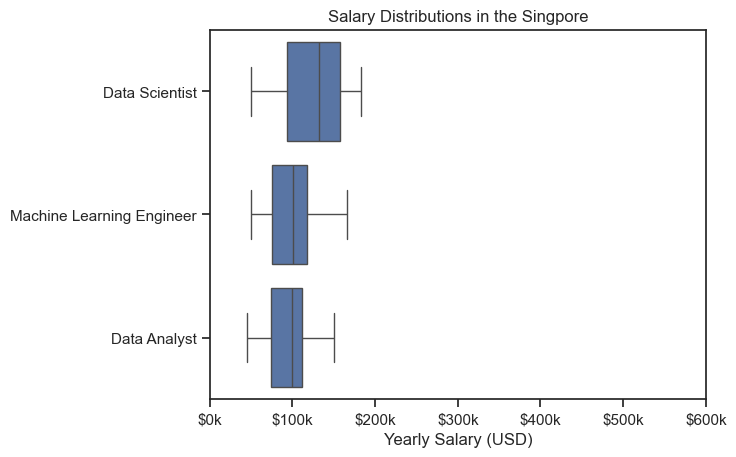

In [46]:
sns.boxplot(data= df_sg_specific_jobs, x= 'salary_year_avg', y='job_title_short', order= job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the Singpore')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0,600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Ivestigate Median Salary Vs Skill for Data Analysis

In [47]:
df_da_sg = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Singapore')]

df_da_sg = df_da_sg.dropna(subset=['salary_year_avg'])

In [48]:
df_da_sg = df_da_sg.explode('job_skills')

df_da_sg[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
3457,100500.0,python
3457,100500.0,sql
3457,100500.0,numpy
3457,100500.0,pandas
3457,100500.0,zoom


In [50]:
df_da_top_sg = df_da_sg.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by= 'median',ascending=False)

df_da_top_sg = df_da_top_sg.head(10)

df_da_top_sg

,count,median
job_skills,,
spark,5,149653.0
looker,1,111175.0
linux,1,109500.0
word,2,105837.5
powerpoint,2,105837.5
flow,3,105000.0
python,12,102750.0
aws,5,100500.0
pandas,1,100500.0


In [51]:
df_da_skills = df_da_sg.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by= 'count', ascending=False)

df_da_skills = df_da_skills.head(10).sort_values(by= 'median', ascending=False)

df_da_skills

,count,median
job_skills,,
spark,5,149653.0
flow,3,105000.0
python,12,102750.0
tableau,9,100500.0
excel,8,100500.0
aws,5,100500.0
r,6,99500.0
sql,16,98500.0
power bi,4,90000.0


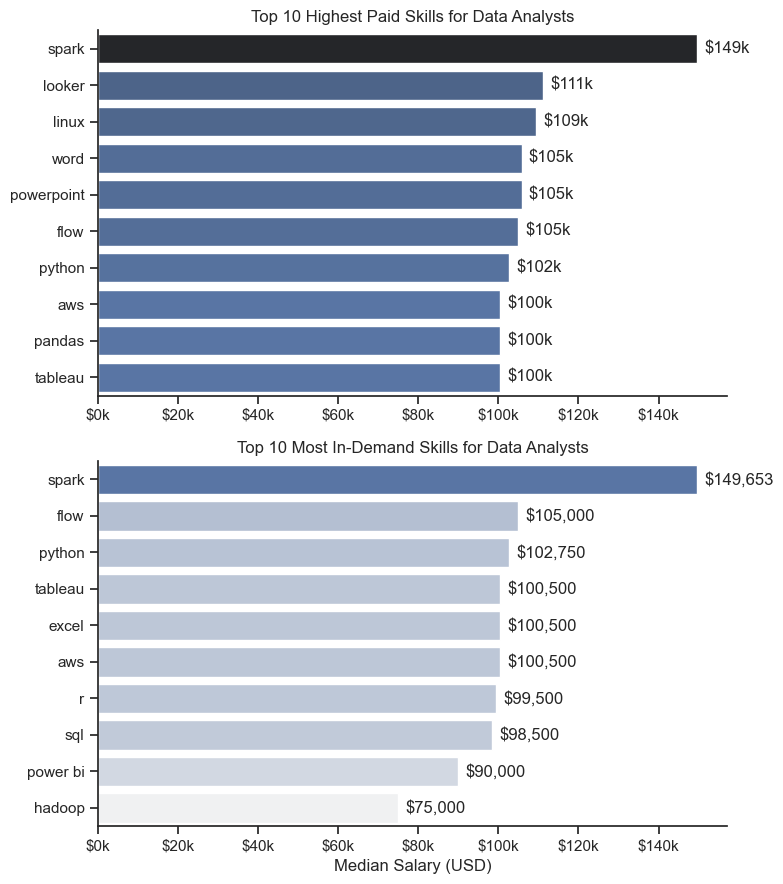

In [52]:
fig, ax = plt.subplots(2, 1, figsize=(8, 9))

sns.set_theme(style='ticks')

# First bar plot
sns.barplot(data=df_da_top_sg, x='median', y=df_da_top_sg.index, ax=ax[0], hue='median', palette='dark:b_r')
sns.despine()
ax[0].legend().remove()

# Adding salary annotations for the first bar plot
for i, v in enumerate(df_da_top_sg['median']):
    ax[0].annotate(f'${int(v/1000):,}k',  # Format as currency
                   xy=(v, i), 
                   xytext=(5, 0), 
                   textcoords='offset points', 
                   va='center', 
                   ha='left')

ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

# Second bar plot
sns.barplot(data=df_da_skills, x='median', y=df_da_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()

# Adding salary annotations for the second bar plot
for i, v in enumerate(df_da_skills['median']):
    ax[1].annotate(f'${int(v):,}',  # Format as currency
                   xy=(v, i), 
                   xytext=(5, 0), 
                   textcoords='offset points', 
                   va='center', 
                   ha='left')

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
